In [5]:
import snscrape
import snscrape.modules.twitter as sn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
def politico(nome) : 
    #Definizione ricerca
    dizionario = [' "Klimawandel"' , '"Emissionen"' , '"Die globale Erwärmung"' ,
 '"Klimanotstands"' ,'"Pariser Abkommen"' , '"Treibhausgase"' , '"renewables"' , '"Klimastreik"' , '"Klimaregierung"']
    claim = nome  + dizionario[0]
    for i in dizionario :
        claim = claim  + ' OR ' + i 
    claim = claim  + ' until:2017-9-24 since:2016-9-24'
    print(claim)

    #ricerca e conto
    scrape = sn.TwitterSearchScraper(claim)
    counter = 0
    for i in scrape.get_items() :
        counter = counter +1
        
    #conto totale    
    claim = nome + ' until:2017-9-24 since:2016-9-24'
    scrape = sn.TwitterSearchScraper(claim)
    counter_tot = 0
    for i in scrape.get_items() :
        counter_tot = counter_tot +1

    if(counter_tot  == 0) : print('Errore')

    return counter/counter_tot , counter_tot , counter

In [7]:
Sholz = politico('from:OlafScholz')
SPD = politico('from:spdde')

Verdina = politico('from:ABaerbockArchiv')
verdi = politico('from:Die_Gruenen')

Laschet = politico('from:ArminLaschet')
CDUCSU = politico('from:cducsubt')

Weidel = politico('from:Alice_Weidel')

FDP = politico('from:fdp')
Lindner = politico('from:c_lindner')

DIE = politico('from:dieLinke')
Bartsch = politico('from:DietmarBartsch')

from:OlafScholz "Klimawandel" OR  "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2017-9-24 since:2016-9-24
from:spdde "Klimawandel" OR  "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2017-9-24 since:2016-9-24
from:ABaerbockArchiv "Klimawandel" OR  "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2017-9-24 since:2016-9-24
from:Die_Gruenen "Klimawandel" OR  "Klimawandel" OR "Emissionen" OR "Die globale Erwärmung" OR "Klimanotstands" OR "Pariser Abkommen" OR "Treibhausgase" OR "renewables" OR "Klimastreik" OR "Klimaregierung" until:2017-9-24 since:2016-9-24
from:ArminLaschet "Klimawandel" OR  "Klimawandel" O

In [8]:
def somma(a , b) : 
    c = []
    for i in range(len(a)) : 
        c.append(a[i] + b[i])

    c[0] = c[2]/c[1]
    return c

In [9]:
risultati = [20.5 , 32.9, 8.9, 10.7 , 12.6 , 9.2 ]
partiti = ['SPD' , 'CDU/CSU' , 'Verdi' , 'FDP' , 'AfD' , 'Linke']
tweet = [somma(Sholz , SPD) , somma(CDUCSU , Laschet) , somma(verdi , Verdina) , somma(Lindner , FDP) , Weidel , somma(DIE , Bartsch)]
tweet_p = [somma(Sholz , SPD)[0] , somma(CDUCSU , Laschet)[0] , somma(verdi , Verdina)[0] , somma(Lindner , FDP)[0] ,  Weidel[0] , somma(DIE , Bartsch)[0]]
colori = ['red' , 'black' , 'green' , 'yellow' , 'lightblue' , 'purple']

dati = {'Partiti' : partiti , 'Tweet' : tweet , 'Risultati' : risultati , 'Colori' : colori , 'Tweet_p' : tweet_p}
Dati = pd.DataFrame(dati)
Dati.Tweet_p = (Dati.Tweet_p*50)
Dati.Tweet_p[4] = Dati.Tweet_p[4]*2
Dati.sort_values(by = 'Tweet_p' , inplace = True , ignore_index = True)
for i in range(len(Dati.Tweet)) :
    Dati.Tweet_p[i] = '{:1.2f}'.format(Dati.Tweet_p[i])

/tmp/ipykernel_76935/2514385697.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[4] = Dati.Tweet_p[4]*2
/tmp/ipykernel_76935/2514385697.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dati.Tweet_p[i] = '{:1.2f}'.format(Dati.Tweet_p[i])


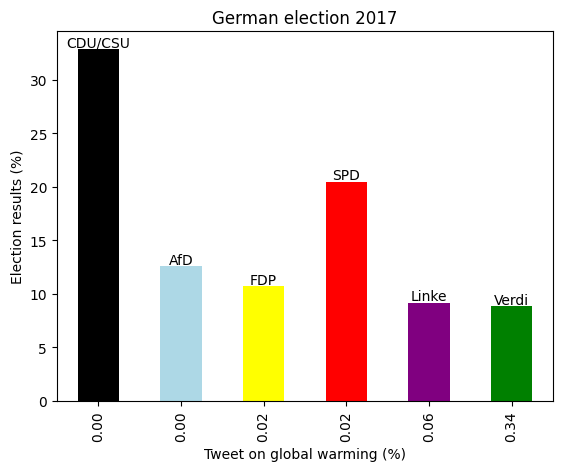

In [10]:
ax = Dati.plot.bar(x = 'Tweet_p' , y = 'Risultati'  , color= Dati['Colori'].array , legend = False , 
xlabel = 'Tweet on global warming (%)' , ylabel = 'Election results (%)' , title = "German election 2017")

counter = 0
for patch in ax.patches :
    bl = patch.get_xy()
    x = 0.5 * patch.get_width() + bl[0] 
    y = patch.get_height() + bl[1] +0.2
    ax.text(x,y,(Dati.Partiti[counter]),
            ha='center', rotation='horizontal')
    counter = counter +1

In [12]:
Dati.to_csv('Elezioni2017.csv' , index = False)